In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly as py
import plotly.graph_objs as go


In [3]:
data = pd.read_csv('data/online_shoppers_intention.csv')
data.shape

(12330, 18)

In [4]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Verisetinde 10 sayısal değer ile 8 kategorik değer bulunmaktadır.  Ayrıca, verisetinde 12.330 oturum (session) bulunmaktadır. Bu oturumların 10.422'si alışverişle sonuçlanmamıştır (negative class), 1.908'i ise alışverişle sonuçlanmıştır (positive class).

“Administrative”, “Administrative Duration”, “Informational”, “Informational Duration”, “Product Related” ve “Product Related Duration” öznitelikleri, ziyaretçinin oturum süresince gezdiği farklı türdeki sayfaların sayısını ve her bir sayfa kategorisinde harcanan toplam süreyi temsil eder.

Bunlar, kullanıcının ziyaret ettiği sayfaların URL bilgilerinden türetilmiş ve kullanıcı bir eylem gerçekleştirdiğinde gerçek zamanlı olarak güncellenen sayısal özniteliklerdir. Örneğin, bir kullanıcı "Product Related" sayfasını ziyaret ettiğinde, "Product Related" sayısı 1 artar ve "Product Related Duration" sayısı, kullanıcının o sayfada geçirdiği süre kadar artar.

“Bounce Rate” (Hemen Çıkma Oranı), “Exit Rate” (Çıkış Oranı) ve “Page Value” (Sayfa Değeri) öznitelikleri, e-ticaret sitesindeki her sayfa için Google Analytics tarafından ölçülen metrikleri temsil eder.

Bounce Rate: Bir web sayfası için bu değerin anlamı, siteye o sayfadan giren ve başka hiçbir sayfaya geçmeden siteden ayrılan ziyaretçilerin yüzdesidir.

Exit Rate: Belirli bir web sayfası için, sayfa görüntülemelerinin oturumdaki son işlem olma oranıdır.

Page Value: Bir kullanıcının e-ticaret işlemini tamamlamadan önce ziyaret ettiği web sayfalarının ortalama değerini ifade eder.

“Special Day” (Özel Gün) özniteliği, oturum tarihinin özel bir güne (örneğin Anneler Günü, Sevgililer Günü vb.) yakınlığını gösterir. Bu tür özel günlere yakın oturumların, alışverişle sonuçlanma olasılığı daha yüksektir.

Bu özniteliğin değeri, sipariş tarihi ile teslim tarihi arasındaki süre gibi e-ticaret dinamikleri dikkate alınarak belirlenir. Örneğin, Sevgililer Günü için bu değer 2–12 Şubat tarihleri arasında sıfırdan farklı bir değer alır; bu tarihler öncesinde ve sonrasında ise sıfırdır (başka özel günlere yakın olmadığı sürece). 8 Şubat tarihinde maksimum 1 değerini alır.

Veri setinde ayrıca şu bilgiler de yer almaktadır:

İşletim sistemi (Operating System)

Tarayıcı (Browser)

Bölge (Region)

Trafik türü (Traffic Type)

Ziyaretçi tipi (Visitor Type) → Yeni veya geri dönen ziyaretçi

Hafta sonu bilgisi (Weekend) → Boolean (True/False)

Yılın ayı (Month)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
data.isnull().sum()


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
data['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

C:\Users\Yasin\AppData\Local\Temp\ipykernel_19200\322803361.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Revenue', data=data, palette='Set1')


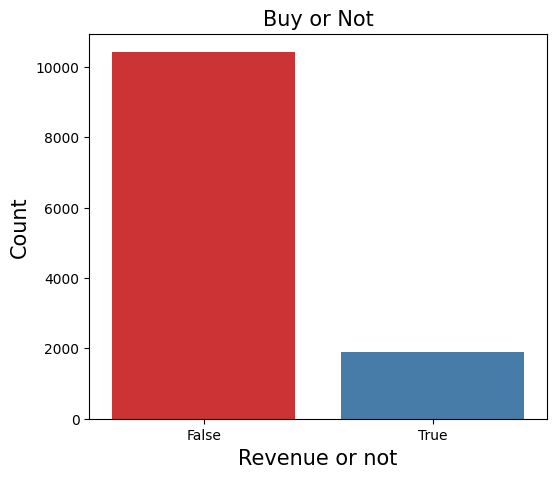

In [13]:
plt.rcParams['figure.figsize'] = (13, 5)

plt.subplot(1, 2, 1)
sns.countplot(x='Revenue', data=data, palette='Set1')
plt.title('Buy or Not', fontsize=15)
plt.xlabel('Revenue or not', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [14]:
data['Weekend'].value_counts()

Weekend
False    9462
True     2868
Name: count, dtype: int64

C:\Users\Yasin\AppData\Local\Temp\ipykernel_19200\2000639768.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weekend', data=data, palette='inferno')


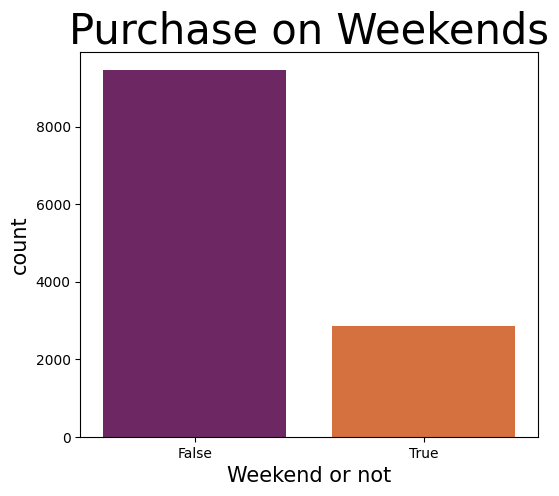

In [15]:
plt.rcParams['figure.figsize'] = (13,5)
plt.subplot(1, 2, 2)
sns.countplot(x='Weekend', data=data, palette='inferno')
plt.title('Purchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

In [16]:
data['OperatingSystems'].value_counts()

OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: count, dtype: int64

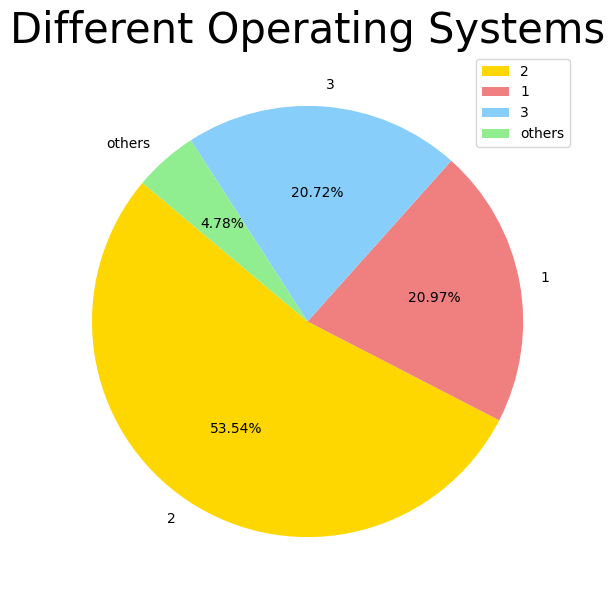

In [31]:
plt.rcParams['figure.figsize'] = (18, 7)
size = [6601, 2585, 2555, 589]
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']
labels = "2", "1", "3", "others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, autopct = '%1.2f%%', startangle = 140)
plt.title('Different Operating Systems', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [32]:
data['Browser'].value_counts()

Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: count, dtype: int64

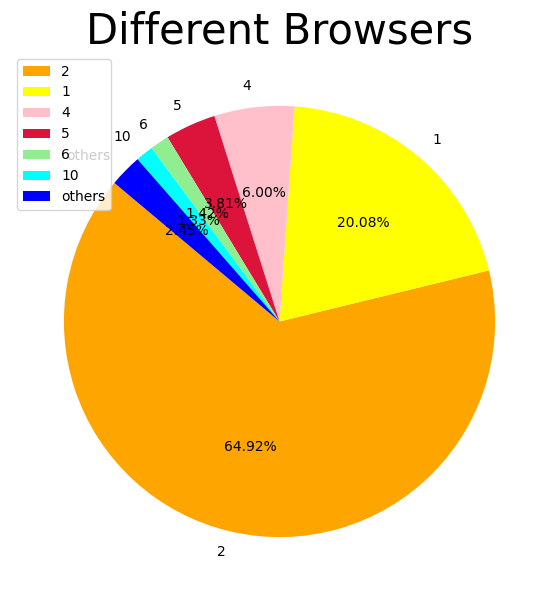

In [34]:
plt.rcParams['figure.figsize'] = (18, 7)

size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1", "4", "5", "6", "10", "others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, autopct = '%1.2f%%', startangle = 140)
plt.title('Different Browsers', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [35]:
data['Month'].value_counts()

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

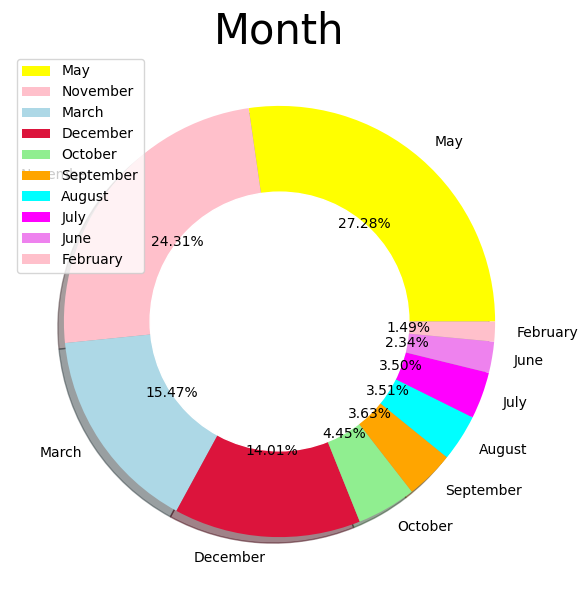

In [36]:
size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['yellow', 'pink', 'lightblue', 'crimson', 'lightgreen', 'orange', 'cyan', 'magenta', 'violet', 'pink', 'lightblue', 'red']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.rcParams['figure.figsize'] = (18, 7)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Month', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

In [37]:
data['VisitorType'].value_counts()

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

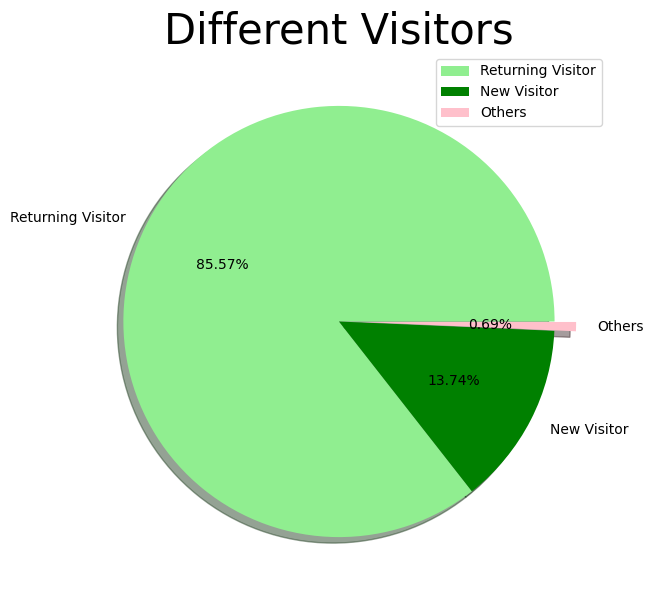

In [38]:
plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['lightGreen', 'green', 'pink']
labels = "Returning Visitor", "New Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [39]:
data['TrafficType'].value_counts()

TrafficType
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: count, dtype: int64

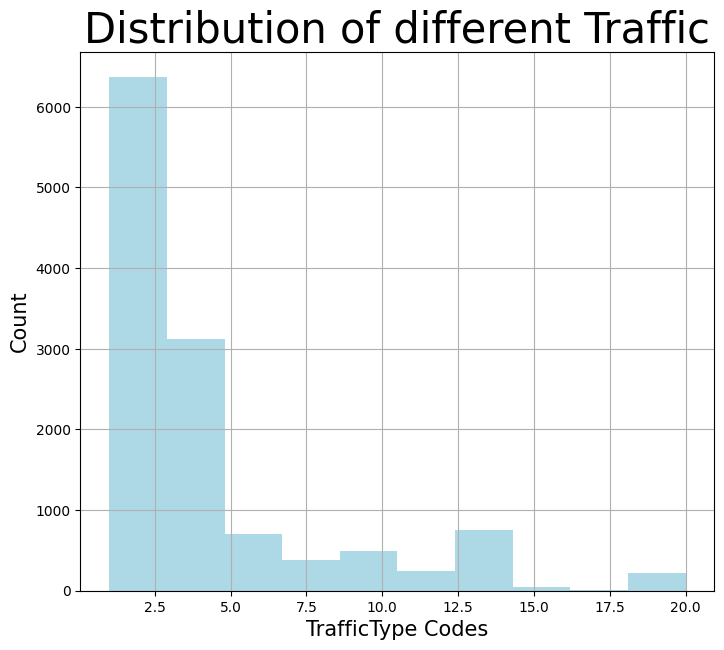

In [40]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(data['TrafficType'], color = 'lightblue')
plt.title('Distribution of different Traffic', fontsize = 30)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.grid()
plt.show()

In [41]:
data['Region'].value_counts()

Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: count, dtype: int64

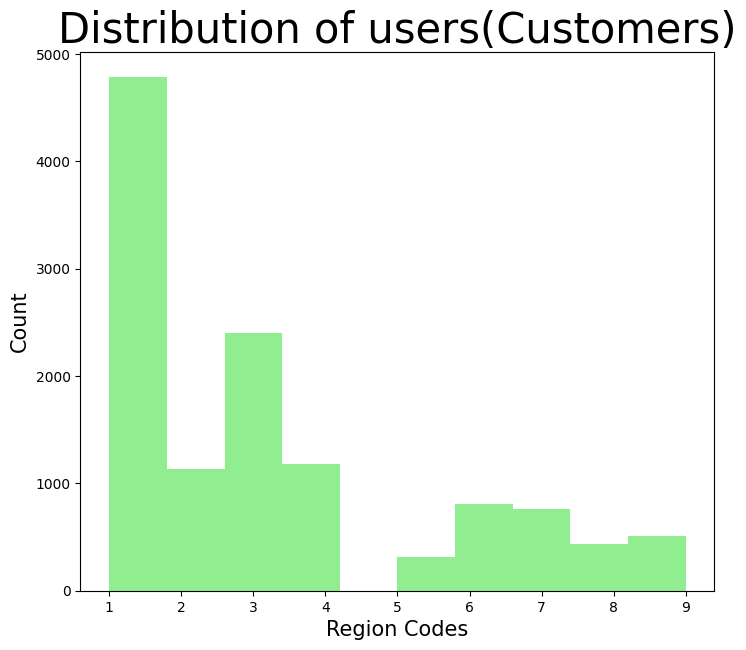

In [42]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(data['Region'], color = 'lightgreen')
plt.title('Distribution of users(Customers)', fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

In [43]:
data['SpecialDay'].value_counts()

SpecialDay
0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: count, dtype: int64

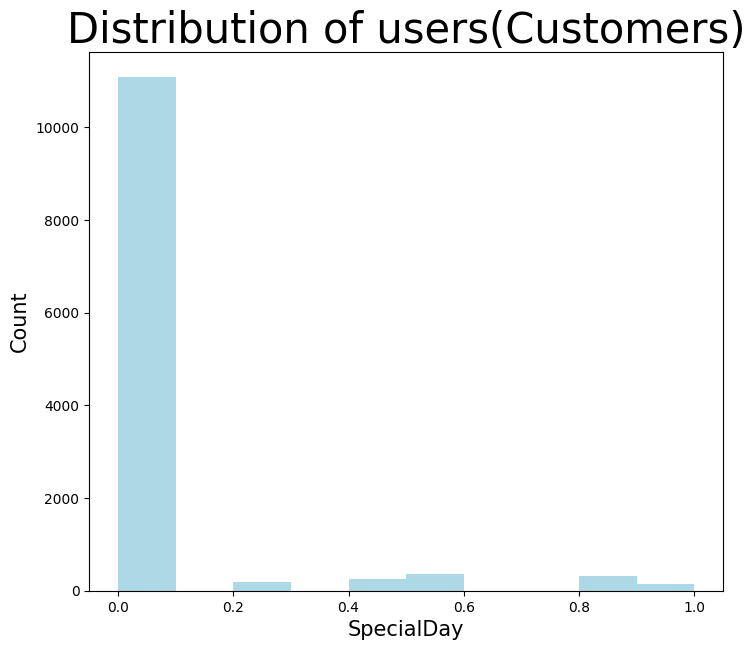

In [44]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(data['SpecialDay'], color = 'lightblue')
plt.title('Distribution of users(Customers)', fontsize = 30)
plt.xlabel('SpecialDay', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

C:\Users\Yasin\AppData\Local\Temp\ipykernel_19200\42572125.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data['Administrative_Duration'], y=data['Revenue'], palette = 'pastel', orient='h')


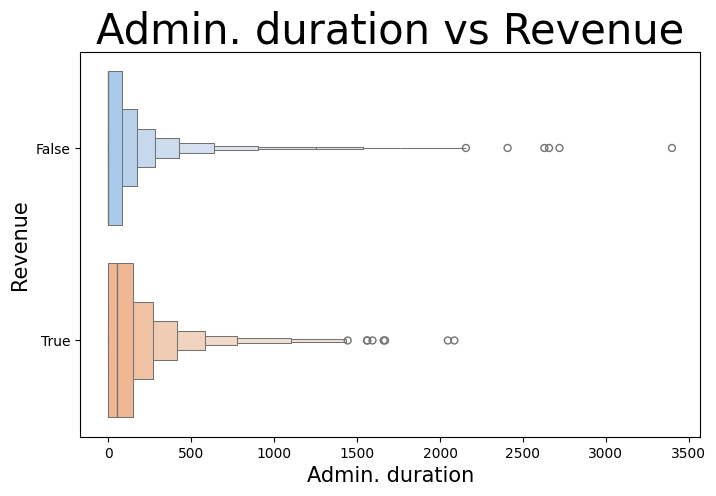

In [49]:
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(x=data['Administrative_Duration'], y=data['Revenue'], palette = 'pastel', orient='h')
plt.title('Admin. duration vs Revenue', fontsize = 30)
plt.xlabel('Admin. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

C:\Users\Yasin\AppData\Local\Temp\ipykernel_19200\3115386404.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data['Informational_Duration'], y=data['Revenue'], palette = 'rainbow', orient = 'h')


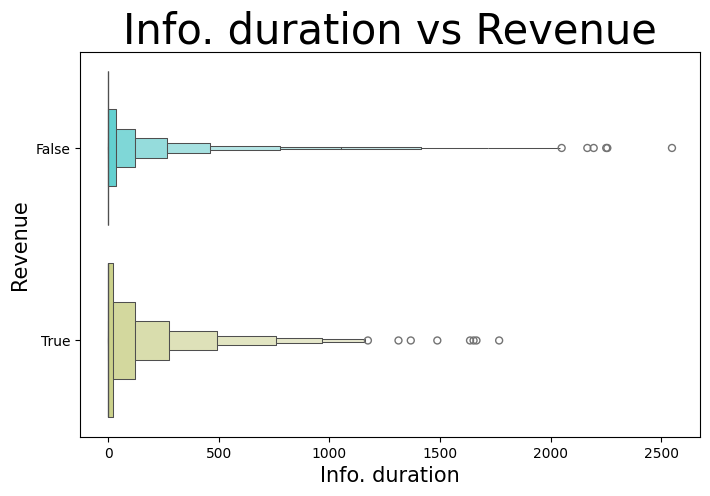

In [50]:
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(x=data['Informational_Duration'], y=data['Revenue'], palette = 'rainbow', orient = 'h')
plt.title('Info. duration vs Revenue', fontsize = 30)
plt.xlabel('Info. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

plt.show()

C:\Users\Yasin\AppData\Local\Temp\ipykernel_19200\217100703.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data['ProductRelated_Duration'], y=data['Revenue'], palette = 'inferno', orient = 'h')


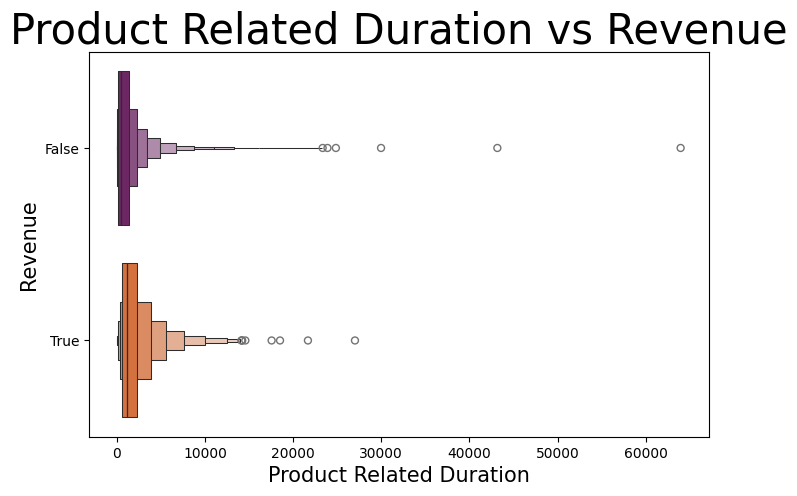

In [52]:
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(x=data['ProductRelated_Duration'], y=data['Revenue'], palette = 'inferno', orient = 'h')
plt.title('Product Related Duration vs Revenue', fontsize = 30)
plt.xlabel('Product Related Duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()